In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

In [2]:
#load the dataset
data = pd.read_csv('creditcard.csv')
print(data.head(), data.shape)

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [3]:
data.isnull().any().describe()

count        31
unique        1
top       False
freq         31
dtype: object

In [4]:
data.duplicated().any()

True

In [5]:
data.duplicated().sum()

1081

In [6]:
data = data.drop_duplicates()
data.shape

(283726, 31)

In [7]:
#view statistical analysis of the data
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [8]:
#define the fraud and legitimate class values
fraud=data[data['Class']==1]
legitimate=data[data['Class']==0]
print(fraud.shape, legitimate.shape)

(473, 31) (283253, 31)


array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

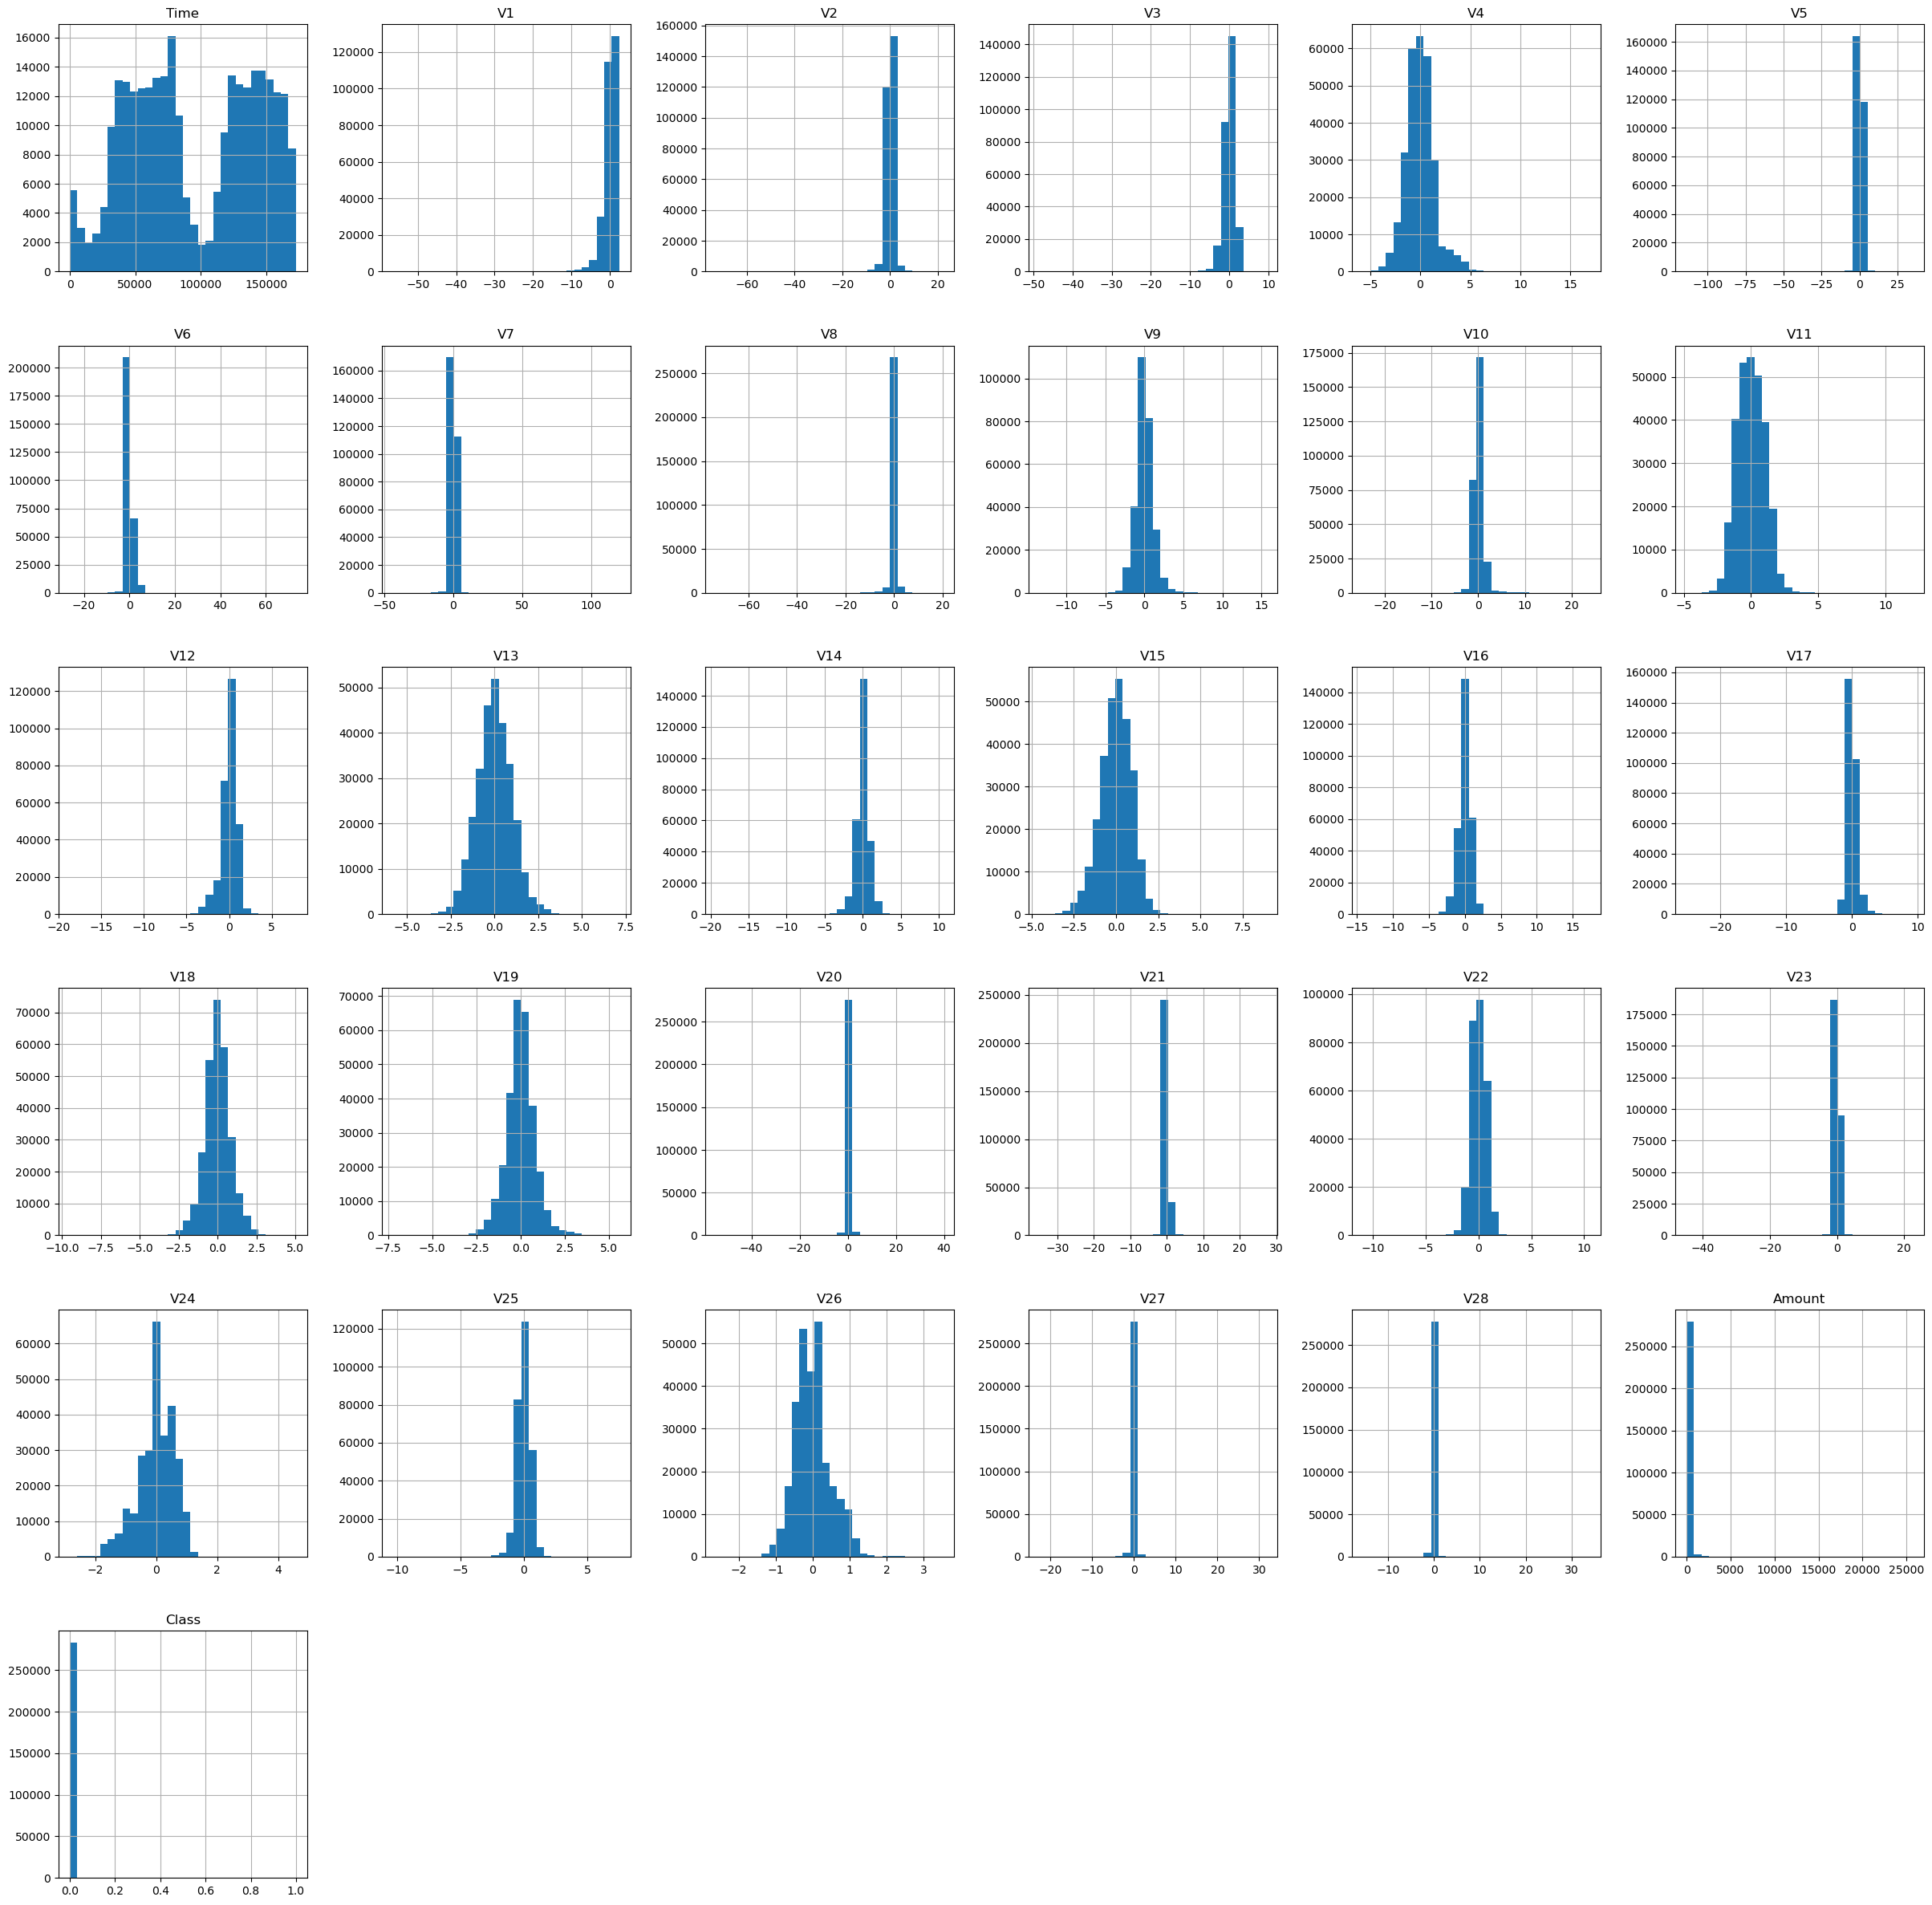

In [9]:
#plot histogram to view distribution of features
data.hist(bins=30,figsize=(30,30))

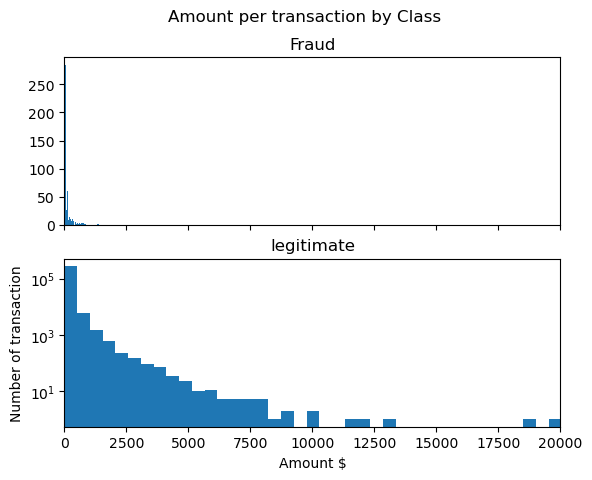

In [10]:
#plotting the amount in relation to fraudulent and legitimate transactions 
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by Class')
ax1.hist(fraud.Amount, bins=50)
ax1.set_title('Fraud')
ax2.hist(legitimate.Amount, bins=50)
ax2.set_title('legitimate')
plt.xlabel('Amount $')
plt.ylabel('Number of transaction')
plt.xlim(0, 20000)
plt.yscale('log')
plt.show();

In [11]:
#Amount feature having large scale difference requires robust scaling to address outliers
from sklearn.preprocessing import RobustScaler
data1=data.copy()
scaler=RobustScaler()
data1['stdAmount']=scaler.fit_transform(data['Amount'].to_numpy().reshape(-1,1))
data1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,stdAmount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,1.774718
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.268530
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,4.959811
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,1.411487
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.667362


In [12]:
#define the fraud and legitimate class values
frd=data1[data1['Class']==1]
legit=data1[data1['Class']==0]
print(frd.shape, legit.shape)

(473, 32) (283253, 32)


In [14]:
data2=data1.drop(columns=['Time', 'Amount'])
print(data2.head(), data2.shape)

         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.098698  0.363787  0.090794  ... -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425 -0.166974  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  0.207643  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  0.753074  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Class  stdAmount  
0  0.1

In [16]:
# view percentage of imbalance
class_counts = data2['Class'].value_counts()

# Calculate the percentage of each class
majority = (class_counts[0] / len(data2)) * 100
minority = (class_counts[1] / len(data2)) * 100

print(f"Percentage of Majority Class: {majority:.2f}%")
print(f"Percentage of Minority Class: {minority:.2f}%")

Percentage of Majority Class: 99.83%
Percentage of Minority Class: 0.17%


In [17]:
#define features and target columns
X=data2.drop('Class', axis=1)
y=data2.iloc[:,-2]
print(X.head())
print(y.head())

         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V20       V21       V22       V23  \
0  0.098698  0.363787  0.090794  ...  0.251412 -0.018307  0.277838 -0.110474   
1  0.085102 -0.255425 -0.166974  ... -0.069083 -0.225775 -0.638672  0.101288   
2  0.247676 -1.514654  0.207643  ...  0.524980  0.247998  0.771679  0.909412   
3  0.377436 -1.387024 -0.054952  ... -0.208038 -0.108300  0.005274 -0.190321   
4 -0.270533  0.817739  0.753074  ...  0.408542 -0.009431  0.798278 -0.137458   

        V24       V25       V26       V27       V28  stdAmount  
0  

In [18]:
#split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape,X_test.shape

((226980, 29), (56746, 29))

In [19]:
print(y_train.value_counts(),'\n',Counter(y_test))

0    226597
1       383
Name: Class, dtype: int64 
 Counter({0: 56656, 1: 90})


In [61]:
#Model training and evaluation
from keras.initializers import glorot_uniform
from keras.models import Sequential
from keras.layers import Dense
from keras.metrics import Precision,Recall
from sklearn.metrics import average_precision_score


seed=42
np.random.seed(seed)
tf.random.set_seed(seed)

#model initialization
model = Sequential()
model.add(Dense(32, input_dim=29, activation='relu',
                kernel_initializer=glorot_uniform(seed=seed)))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy',Precision(),Recall()])

#model fit 
model.fit(X_train, y_train, epochs=20, batch_size=200,)

# Make predictions
y_pred =(model.predict(X_test))
print(average_precision_score(y_test,y_pred))

Epoch 1/20
757/757 [==============================] - 5s 4ms/step - loss: 0.0319 - accuracy: 0.9984 - precision_3: 0.5296 - recall_3: 0.4204
Epoch 2/20
757/757 [==============================] - 3s 4ms/step - loss: 0.0034 - accuracy: 0.9994 - precision_3: 0.8510 - recall_3: 0.7755
Epoch 3/20
757/757 [==============================] - 3s 4ms/step - loss: 0.0030 - accuracy: 0.9994 - precision_3: 0.8347 - recall_3: 0.7911
Epoch 4/20
757/757 [==============================] - 3s 4ms/step - loss: 0.0028 - accuracy: 0.9994 - precision_3: 0.8374 - recall_3: 0.8068
Epoch 5/20
757/757 [==============================] - 3s 4ms/step - loss: 0.0026 - accuracy: 0.9994 - precision_3: 0.8391 - recall_3: 0.8172
Epoch 6/20
757/757 [==============================] - 3s 4ms/step - loss: 0.0024 - accuracy: 0.9994 - precision_3: 0.8505 - recall_3: 0.8172
Epoch 7/20
757/757 [==============================] - 3s 4ms/step - loss: 0.0023 - accuracy: 0.9995 - precision_3: 0.8491 - recall_3: 0.8225
Epoch 8/20
75

In [48]:
#model evaluation
# Predict the probabilities of fraud class==1 for the test set 
model_probs = model.predict(X_test).flatten()
print(model_probs)

# Calculate imbalanced AUPRC
model_auprc = average_precision_score(y_test, model_probs)

print('model_auprc: ', model_auprc)

1774/1774 [==============================] - 5s 3ms/step
[3.5194564e-06 6.6484201e-10 7.9468998e-07 ... 2.6127157e-07 3.3249905e-06
 9.1440864e-07]
model_auprc:  0.8054655441918273


AUPRC: 0.8051051913224677


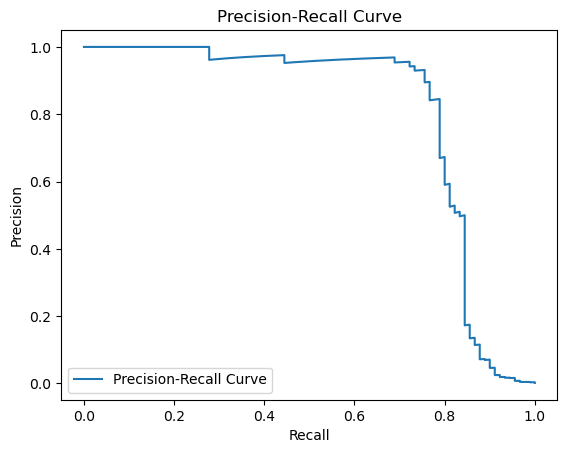

In [49]:
#plotting the precision-recall curve
from sklearn.metrics import precision_recall_curve, auc

# Compute precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

# Plot Precision-Recall Curve
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

# Calculate AUPRC
auprc = auc(recall, precision)
print(f'AUPRC: {auprc}')

plt.show()

In [50]:
# Save the model to an HDF5 file
model.save(r'C:\Users\User\Desktop\TRANSACTGUARD\ANN model.h5')